In [1]:
# Charli XCX - *brat* Deluxe Lyrics Analysis

" In this notebook, I analyze the lyrical content and emotional tone of Charli XCX latest album brat and it's completely different but also still brat. The goal of my project is to explore how the update to her album differs from the original album, brat. The two albums being both listed as disc 1 and 2 respectively. We will then decide whether or not the new addition is truly completely different as Charli states or if it is in fact still brat. "


" In this notebook, I analyze the lyrical content and emotional tone of Charli XCX latest album brat and it's completely different but also still brat. The goal of my project is to explore how the update to her album differs from the original album, brat. The two albums being both listed as disc 1 and 2 respectively. We will then decide whether or not the new addition is truly completely different as Charli states or if it is in fact still brat. "

In [11]:
import pandas as pd

# Load updated lyrics CSV (with correct formatting)
df = pd.read_csv("../01_data/updated_lyrics_file.csv") 

# check column names
print(df.columns)


Index(['track', 'disc', 'lyrics'], dtype='object')


In [12]:

import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# For word clouds later
#from wordcloud import WordCloud, STOPWORDS

# Load final cleaned dataset
df = pd.read_csv("../01_data/updated_lyrics_file.csv")
df['lyrics']

df.head()


,track,disc,lyrics
0,360 featuring robyn & yung lean,1,\nThey-they-they all wanna sound like me\nAll ...
1,Club classics featuring bb trickz,1,"\nBumpin' that, bumpin' that, bumpin' that, bu..."
2,Sympathy is a knife featuring ariana grande,1,\nI-i-i-i-it's a knife when you know they're w...
3,I might say something stupid featuring the 197...,1,\nI could say something smart\nBut might say s...
4,Talk talk featuring troye sivan,1,"\nTalk to me\nTroye, baby\nHay una fiesta en m..."


In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

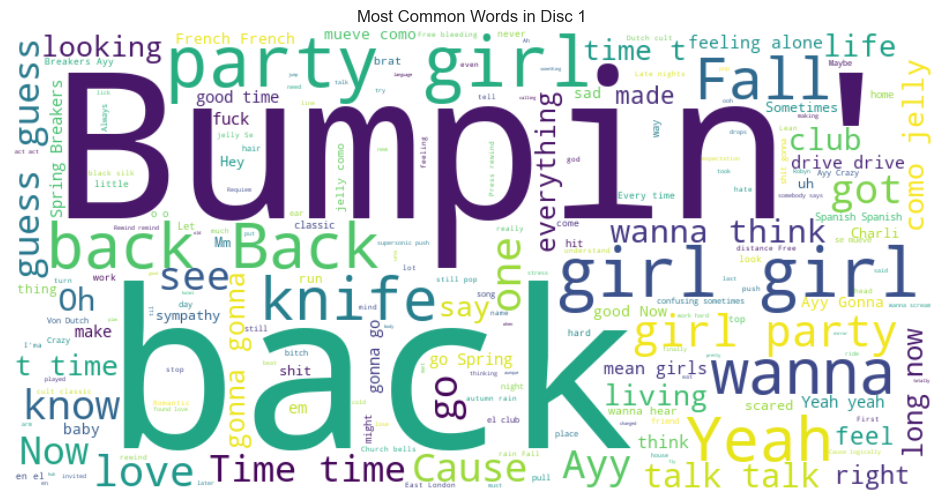

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Combine all lyrics into one long string (Disc 1 or Disc 2)
disc1_text = " ".join(df[df["disc"] == 1]["lyrics"].dropna())
disc2_text = " ".join(df[df["disc"] == 2]["lyrics"].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=STOPWORDS).generate(disc1_text)

# Plot it
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Disc 1")
plt.savefig("charli_wordclouds3.png", dpi=300, bbox_inches='tight')
plt.show()


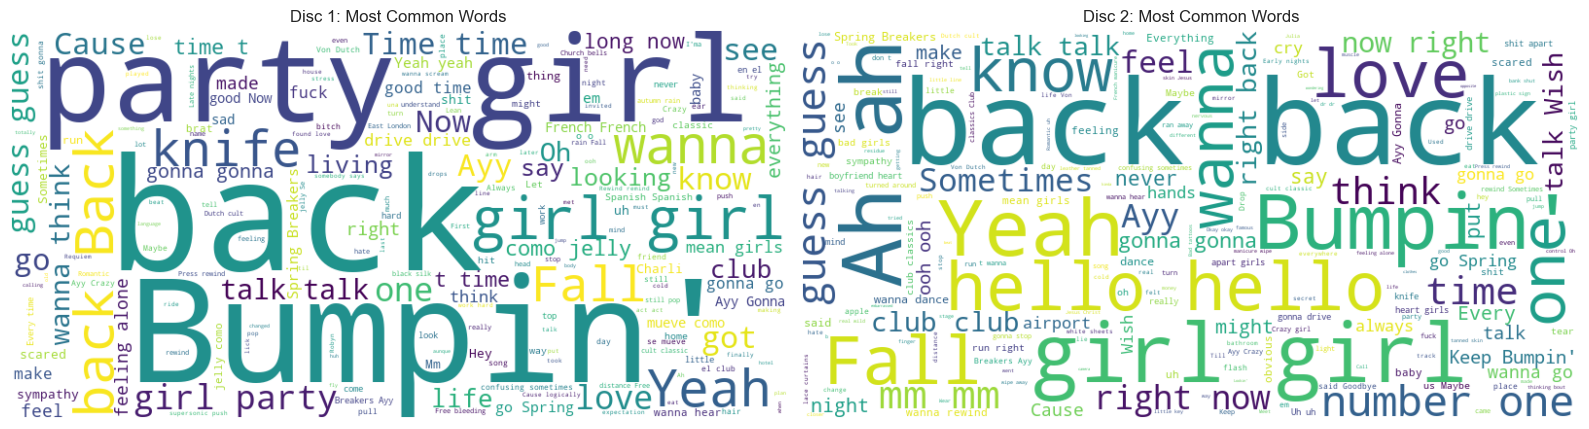

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine lyrics into single strings per disc
disc1_text = " ".join(df[df["disc"] == 1]["lyrics"].dropna())
disc2_text = " ".join(df[df["disc"] == 2]["lyrics"].dropna())

# Generate word clouds
wordcloud1 = WordCloud(width=800, height=400, background_color="white", stopwords=STOPWORDS).generate(disc1_text)
wordcloud2 = WordCloud(width=800, height=400, background_color="white", stopwords=STOPWORDS).generate(disc2_text)

# Plot side by side
plt.figure(figsize=(16, 8))

# Disc 1
plt.subplot(1, 2, 1)
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.title("Disc 1: Most Common Words")

# Disc 2
plt.subplot(1, 2, 2)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.title("Disc 2: Most Common Words")

plt.tight_layout()
plt.savefig("charli_wordclouds1.png", dpi=300, bbox_inches='tight')
plt.show()


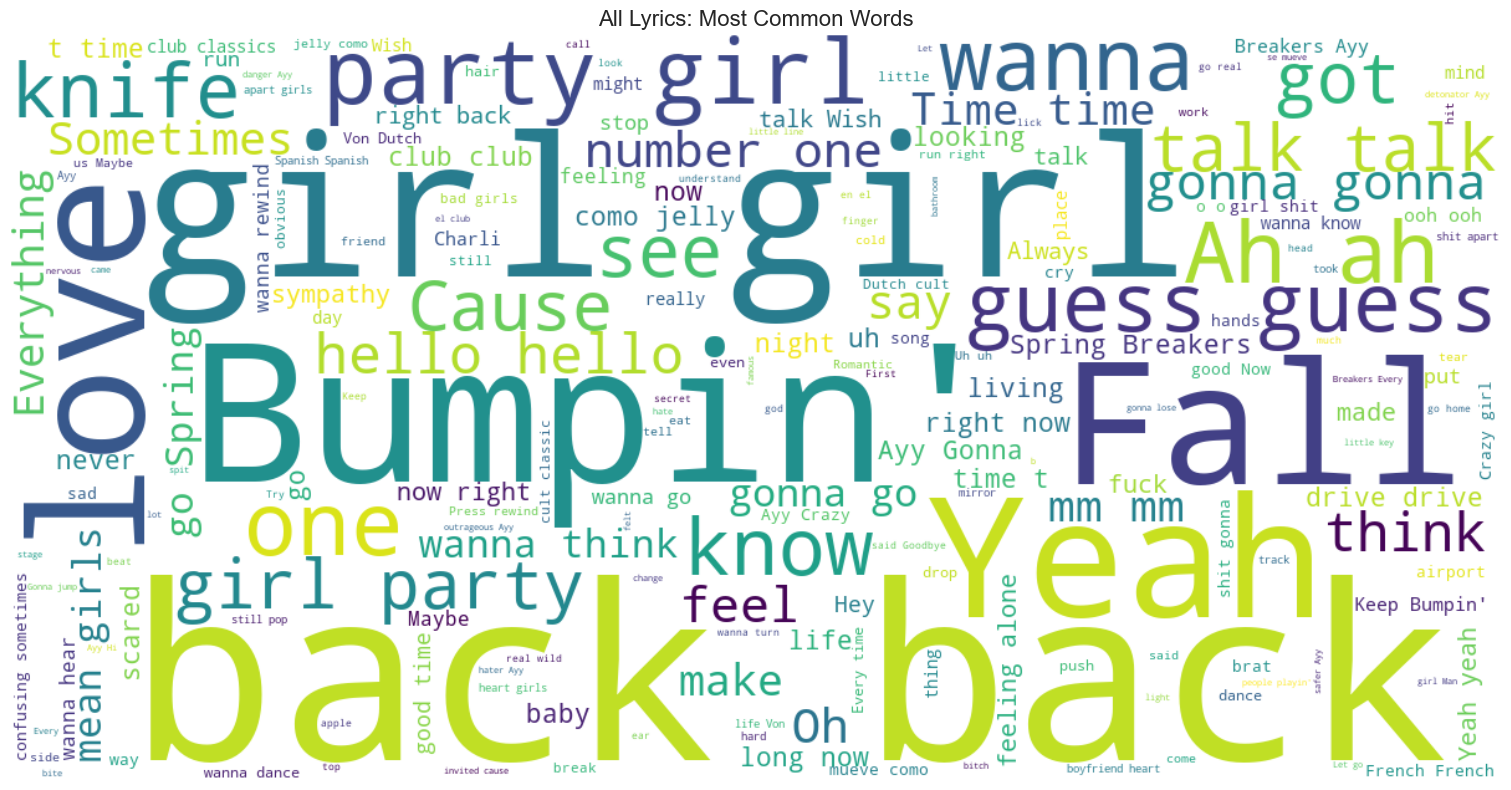

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all lyrics into a single string
full_text = " ".join(df["lyrics"].dropna())

# Generate the word cloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    stopwords=STOPWORDS
).generate(full_text)

# Plot the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("All Lyrics: Most Common Words", fontsize=16)
plt.tight_layout()

# Save high-resolution image
plt.savefig("all_lyrics_wordcloud.png", dpi=300, bbox_inches='tight')

plt.show()


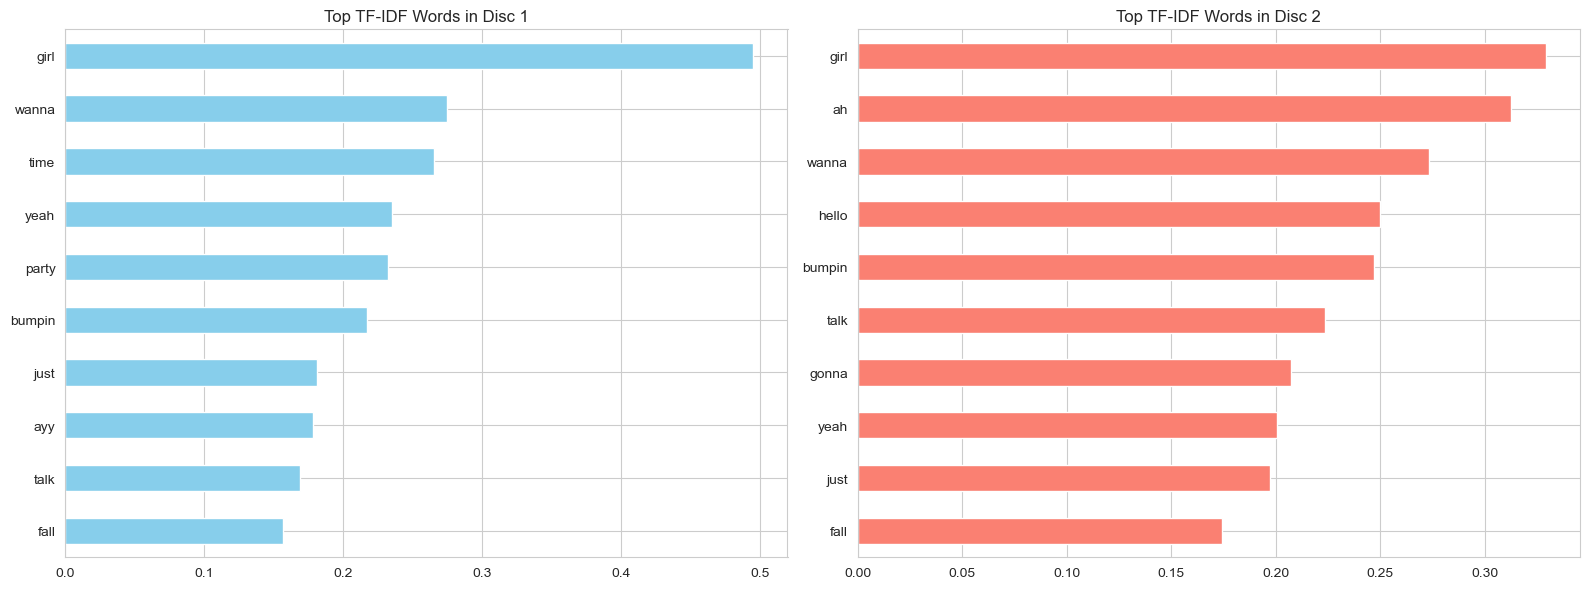

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Combine lyrics into single strings per disc
disc1_text = " ".join(df[df["disc"] == 1]["lyrics"].dropna())
disc2_text = " ".join(df[df["disc"] == 2]["lyrics"].dropna())

# 🔐 Step 1: Preprocess the text to protect "don't"
disc1_text = disc1_text.replace("don't", "dont_placeholder")
disc2_text = disc2_text.replace("don't", "dont_placeholder")

# Step 2: Create document list
documents = [disc1_text, disc2_text]

# Step 3: Run TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(documents)

feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=["Disc 1", "Disc 2"], columns=feature_names).T

# 🔁 Step 4: Restore "don't" for display
tfidf_df.index = tfidf_df.index.str.replace("dont_placeholder", "don't")

# Step 5: Plot top 10 TF-IDF words
top_disc1 = tfidf_df["Disc 1"].sort_values(ascending=False).head(10)
top_disc2 = tfidf_df["Disc 2"].sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

top_disc1.plot(kind="barh", ax=axes[0], color="skyblue")
axes[0].set_title("Top TF-IDF Words in Disc 1")
axes[0].invert_yaxis()

top_disc2.plot(kind="barh", ax=axes[1], color="salmon")
axes[1].set_title("Top TF-IDF Words in Disc 2")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


In [17]:
## the next 3 blocks have to be ran after the rest of the code is ran or it breaks and doesn't have the proper df created. you have to run the rest and then come back and re-run them for it to work.

In [86]:
# Check the shape of tfidf_matrix
print(tfidf_matrix.shape)  # should be (35, N)

# Check the shape of df
print(df.shape)  # should be (35, ...)


(35, 1000)
(35, 7)


In [85]:
binary_matrix = (tfidf_matrix > 0).astype(int)
binary_df = pd.DataFrame(binary_matrix.toarray(), columns=vectorizer.get_feature_names_out())
binary_df['disc'] = df['disc'].values


In [87]:
# --- Count word usage per disc ---
word_usage_by_disc = binary_df.groupby('disc').sum().T
word_usage_by_disc['total_songs'] = word_usage_by_disc.sum(axis=1)
word_usage_by_disc['disc_ratio'] = word_usage_by_disc[2] / word_usage_by_disc['total_songs']
word_usage_by_disc['disc1_ratio'] = word_usage_by_disc[1] / word_usage_by_disc['total_songs']

# --- Top Disc-2 specific words ---
disc_2_specific = word_usage_by_disc[
    (word_usage_by_disc['disc_ratio'] > 0.9) &
    (word_usage_by_disc[2] >= 1)
].sort_values(by='total_songs', ascending=False)

# --- Top Disc-1 specific words ---
disc_1_specific = word_usage_by_disc[
    (word_usage_by_disc['disc1_ratio'] > 0.9) &
    (word_usage_by_disc[1] >= 1)
].sort_values(by='total_songs', ascending=False)

# --- Chi² Test ---
from sklearn.feature_selection import chi2

X = tfidf_matrix
y = df["disc"]
chi_scores, p_vals = chi2(X, y)

chi2_df = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'chi2': chi_scores,
    'p_value': p_vals
}).sort_values(by='chi2', ascending=False)

# --- Print results ---
print("🔷 Top Disc 2 Specific Words:")
print(disc_2_specific.head(10))

print("\n🔶 Top Disc 1 Specific Words:")
print(disc_1_specific.head(10))

print("\n💥 Top 10 Chi² Predictive Words:")
print(chi2_df.head(10))


🔷 Top Disc 2 Specific Words:
disc         1  2  total_songs  disc_ratio  disc1_ratio
hotel        0  4            4         1.0          0.0
diamonds     0  3            3         1.0          0.0
generations  0  3            3         1.0          0.0
could        0  3            3         1.0          0.0
plan         0  3            3         1.0          0.0
power        0  2            2         1.0          0.0
valait       0  2            2         1.0          0.0
suitcase     0  2            2         1.0          0.0
tension      0  2            2         1.0          0.0
constantly   0  2            2         1.0          0.0

🔶 Top Disc 1 Specific Words:
disc       1  2  total_songs  disc_ratio  disc1_ratio
come       7  0            7         0.0          1.0
sat        3  0            3         0.0          1.0
billboard  3  0            3         0.0          1.0
throws     3  0            3         0.0          1.0
fall       3  0            3         0.0          1.0
t

In [88]:
# Assuming `binary_df` has word presence (0/1) and 'disc' column

# Drop the 'disc' column to focus on word counts
words_only = binary_df.drop(columns='disc')

# Create a contingency table: rows = words, columns = disc (1 or 2)
contingency_table = pd.DataFrame({
    'Disc 1': (binary_df['disc'] == 1).values @ words_only.values,
    'Disc 2': (binary_df['disc'] == 2).values @ words_only.values
}, index=words_only.columns)

# Preview the top of the contingency table
contingency_table.head(15)


,Disc 1,Disc 2
10th,0,1
1994,1,0
2020,1,0
360,1,1
365,1,1
666,0,1
999,1,1
abandoned,1,0
abandonment,1,0
abuse,1,0


In [89]:
# Safely make a copy before modifying
top_disc2_df = disc_2_specific.head(10).copy()
top_disc2_df.reset_index(inplace=True)
top_disc2_df.rename(columns={'index': 'word'}, inplace=True)

top_disc1_df = disc_1_specific.head(10).copy()
top_disc1_df.reset_index(inplace=True)
top_disc1_df.rename(columns={'index': 'word'}, inplace=True)

# Display top 10 Chi² predictive words
top_chi2_df = chi2_df.head(10).copy()

In [90]:
top_disc2_df



disc,word,1,2,total_songs,disc_ratio,disc1_ratio
0,hotel,0,4,4,1.0,0.0
1,diamonds,0,3,3,1.0,0.0
2,generations,0,3,3,1.0,0.0
3,could,0,3,3,1.0,0.0
4,plan,0,3,3,1.0,0.0
5,power,0,2,2,1.0,0.0
6,valait,0,2,2,1.0,0.0
7,suitcase,0,2,2,1.0,0.0
8,tension,0,2,2,1.0,0.0
9,constantly,0,2,2,1.0,0.0


In [91]:
top_disc1_df

disc,word,1,2,total_songs,disc_ratio,disc1_ratio
0,come,7,0,7,0.0,1.0
1,sat,3,0,3,0.0,1.0
2,billboard,3,0,3,0.0,1.0
3,throws,3,0,3,0.0,1.0
4,fall,3,0,3,0.0,1.0
5,together,3,0,3,0.0,1.0
6,better,3,0,3,0.0,1.0
7,wild,3,0,3,0.0,1.0
8,black,3,0,3,0.0,1.0
9,stylish,2,0,2,0.0,1.0


In [92]:
top_chi2_df

,word,chi2,p_value
17,advice,1.455700,0.227616
430,jealous,0.874731,0.349649
558,perfect,0.698526,0.403280
410,heart,0.582390,0.445377
972,without,0.555234,0.456187
490,mad,0.513884,0.473462
20,airpods,0.503127,0.478129
526,need,0.501627,0.478786
413,hi,0.500750,0.479171
245,diamonds,0.469571,0.493185


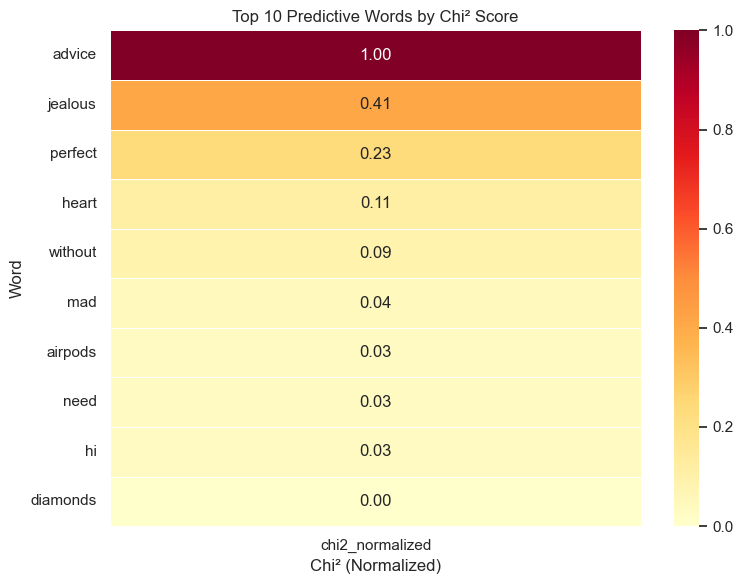

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Take top 10 chi² words
top_chi2 = chi2_df.head(10).copy()
top_chi2.set_index("word", inplace=True)

# Normalize chi² scores for better color scaling (optional)
top_chi2["chi2_normalized"] = (top_chi2["chi2"] - top_chi2["chi2"].min()) / (top_chi2["chi2"].max() - top_chi2["chi2"].min())

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    top_chi2[["chi2_normalized"]], 
    annot=True, 
    cmap="YlOrRd", 
    cbar=True, 
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Top 10 Predictive Words by Chi² Score")
plt.ylabel("Word")
plt.xlabel("Chi² (Normalized)")
plt.tight_layout()
# Save high-resolution image
plt.savefig("top10predictiveheatmap.png", dpi=300, bbox_inches='tight')
plt.show()


In [94]:
from textblob import TextBlob

# Function to get sentiment polarity score (-1 = negative, +1 = positive)
def get_sentiment(text):
    if pd.isna(text) or not text.strip():
        return 0
    return TextBlob(text).sentiment.polarity

# Apply it to each song
df["sentiment"] = df["lyrics"].apply(get_sentiment)

# Preview
df[["track", "disc", "sentiment"]].head()


,track,disc,sentiment
0,360 featuring robyn & yung lean,1,0.128125
1,Club classics featuring bb trickz,1,-0.084091
2,Sympathy is a knife featuring ariana grande,1,0.092081
3,I might say something stupid featuring the 197...,1,-0.036905
4,Talk talk featuring troye sivan,1,0.056909


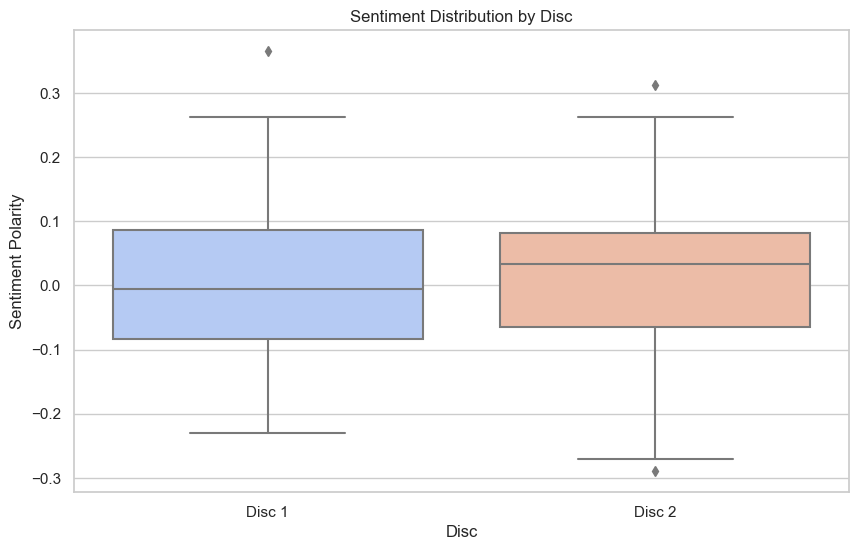

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Plot sentiment distributions per disc
plt.figure(figsize=(10, 6))
sns.boxplot(x="disc", y="sentiment", data=df, palette="coolwarm")
plt.title("Sentiment Distribution by Disc")
plt.xlabel("Disc")
plt.ylabel("Sentiment Polarity")
plt.xticks([0, 1], ["Disc 1", "Disc 2"])
plt.savefig("sentiment_boxplot1.png", dpi=300, bbox_inches='tight')
plt.show()


In [38]:
from scipy.stats import ttest_ind

# Split sentiment scores by disc
disc1_sentiment = df[df["disc"] == 1]["sentiment"].dropna()
disc2_sentiment = df[df["disc"] == 2]["sentiment"].dropna()

# Perform two-sample t-test
t_stat, p_value = ttest_ind(disc1_sentiment, disc2_sentiment, equal_var=False)  # Welch’s t-test (assumes unequal variances)

# Output results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ The difference in sentiment between the discs is statistically significant.")
else:
    print("⚠️ The difference in sentiment between the discs is NOT statistically significant.")


T-statistic: 0.1869
P-value: 0.8528
⚠️ The difference in sentiment between the discs is NOT statistically significant.


### T-Test for Sentiment Differences

To determine whether the sentiment polarity differed significantly between Disc 1 and Disc 2, a two-sample t-test was conducted:

- **T-statistic:** 0.187  
- **P-value:** 0.853

🧠 **Interpretation:** The p-value is much greater than 0.05, suggesting that the observed difference in sentiment is not statistically significant. Therefore, we fail to reject the null hypothesis. The lyrical sentiment across both discs appears to be statistically similar when using TextBlob polarity scores.


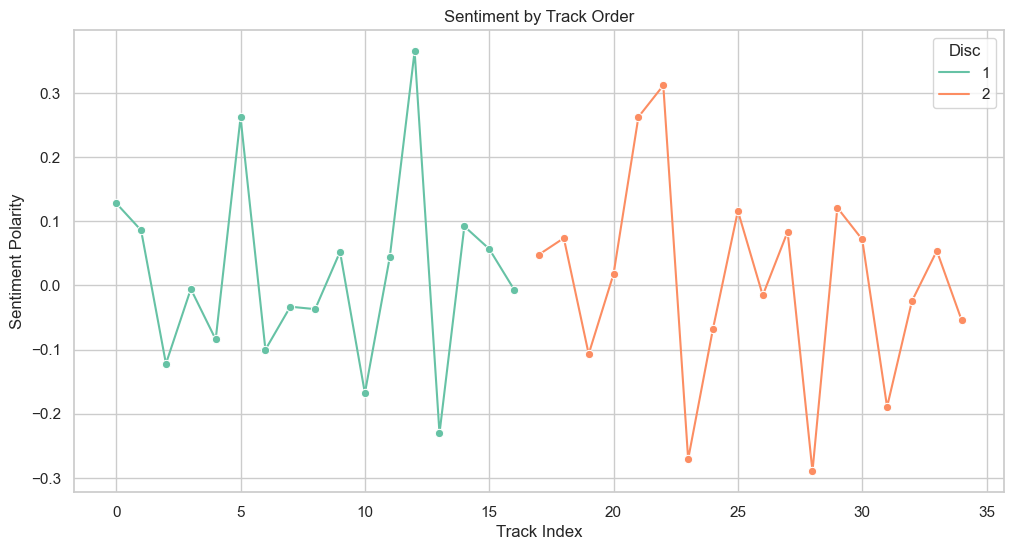

In [39]:
# Sort by track order within each disc
df_sorted = df.sort_values(by=["disc", "track"])

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sorted, x=range(len(df_sorted)), y="sentiment", hue="disc", palette="Set2", marker="o")
plt.title("Sentiment by Track Order")
plt.xlabel("Track Index")
plt.ylabel("Sentiment Polarity")
plt.legend(title="Disc")
plt.savefig("sentiment_linechart.png", dpi=300, bbox_inches='tight')
plt.show()


In [40]:
from nrclex import NRCLex

# Function to extract emotion scores from lyrics
def get_emotions(text):
    if pd.isna(text) or not text.strip():
        return {}
    emo = NRCLex(text)
    return emo.raw_emotion_scores  # raw count of emotion words

# Apply to each row
df["emotion_scores"] = df["lyrics"].apply(get_emotions)

# Convert dicts to DataFrame
emotion_df = df["emotion_scores"].apply(pd.Series).fillna(0)
emotion_df["track"] = df["track"]
emotion_df["disc"] = df["disc"]



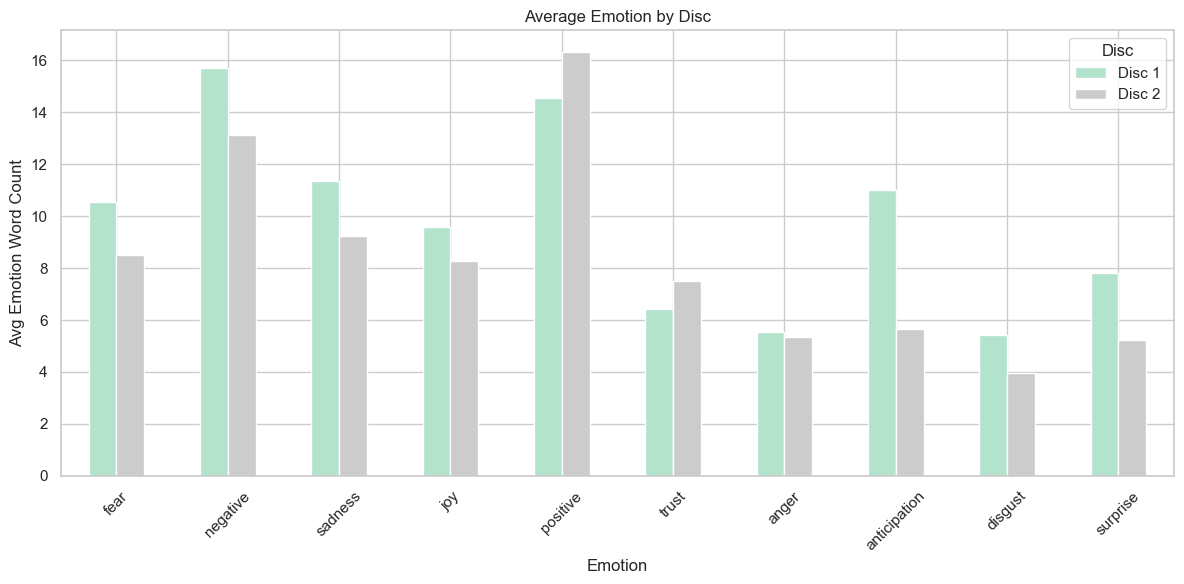

In [41]:
# Drop non-numeric columns before taking the mean
numeric_emotions = emotion_df.drop(columns=["track", "disc"], errors='ignore')

# Group by disc and transpose for plotting
avg_emotions = numeric_emotions.groupby(df["disc"]).mean().T

# Plot
avg_emotions.plot(kind="bar", figsize=(12, 6), colormap="Pastel2")
plt.title("Average Emotion by Disc")
plt.ylabel("Avg Emotion Word Count")
plt.xlabel("Emotion")
plt.xticks(rotation=45)
plt.legend(["Disc 1", "Disc 2"], title="Disc")
plt.tight_layout()
plt.savefig("sentiment_bargraph.png", dpi=300, bbox_inches='tight')
plt.show()



In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Get lyrics per song
lyrics_per_track = df["lyrics"].fillna("")

# Vectorize
vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)
tfidf_matrix = vectorizer.fit_transform(lyrics_per_track)

# Cluster
k = 4  # try 4 clusters (can adjust)
kmeans = KMeans(n_clusters=k, random_state=42)
df["cluster"] = kmeans.fit_predict(tfidf_matrix)


C:\Users\phili\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


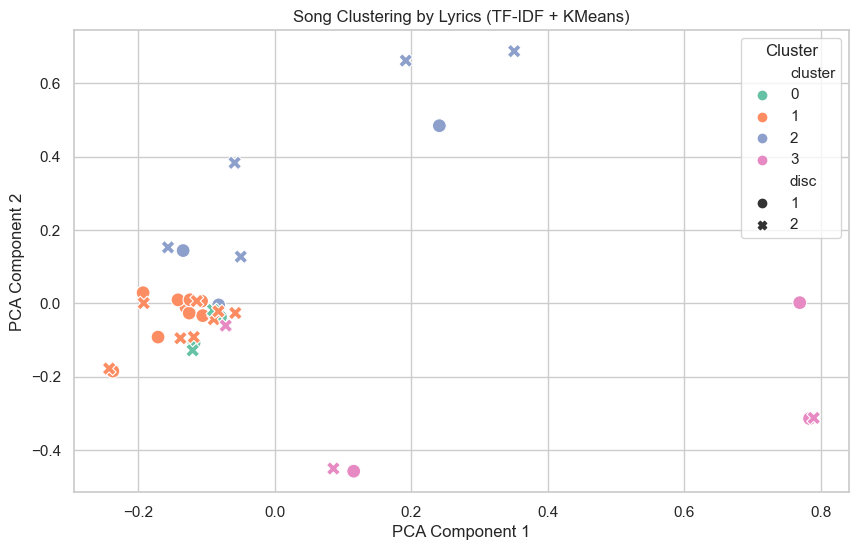

In [43]:
# Reduce to 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=df["cluster"], style=df["disc"], palette="Set2", s=100)
plt.title("Song Clustering by Lyrics (TF-IDF + KMeans)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


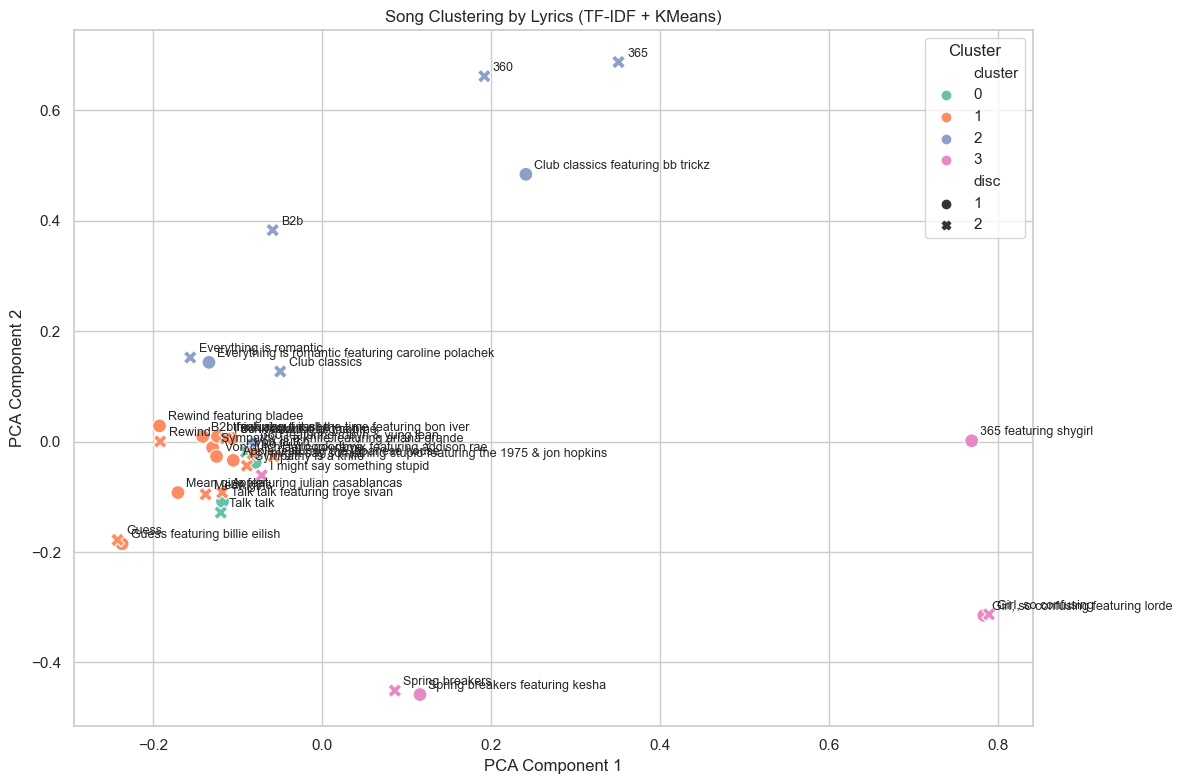

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=df["cluster"], style=df["disc"], palette="Set2", s=100)

# Add text labels
for i in range(len(df)):
    plt.text(reduced[i, 0]+0.01, reduced[i, 1]+0.01, df["track"].iloc[i], fontsize=9)

plt.title("Song Clustering by Lyrics (TF-IDF + KMeans)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [45]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\phili\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords

# Basic clean text
lyrics_corpus = df["lyrics"].fillna("").tolist()

# Vectorize lyrics
vectorizer = CountVectorizer(
    stop_words=stopwords.words("english"),
    max_features=1000,
    lowercase=True
)
X = vectorizer.fit_transform(lyrics_corpus)

# Fit LDA model
lda = LatentDirichletAllocation(n_components=4, random_state=42)
lda.fit(X)


LatentDirichletAllocation(n_components=4, random_state=42)

In [47]:
# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Display top words per topic
def display_topics(model, feature_names, n_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"\n🌀 Topic {idx + 1}:")
        top_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_indices]
        print(" ".join(top_words))

display_topics(lda, feature_names)



🌀 Topic 1:
ayy fall gonna love knife go see drive know cause

🌀 Topic 2:
girl one guess party girls number yeah wanna know mean

🌀 Topic 3:
back talk right wanna yeah club like go wish got

🌀 Topic 4:
bumpin time ah wanna hello yeah think mm rewind good


In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Use TF-IDF matrix as features, disc as label
X_rf = tfidf_matrix
y_rf = df["disc"]

X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Convert classification report to DataFrame
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Optional: round values for better formatting
report_df = report_df.round(3)

# Display
print(report_df)

# Evaluate
print(classification_report(y_test, rf.predict(X_test)))



              precision  recall  f1-score  support
1                 0.167   0.500     0.250    2.000
2                 0.000   0.000     0.000    5.000
accuracy          0.143   0.143     0.143    0.143
macro avg         0.083   0.250     0.125    7.000
weighted avg      0.048   0.143     0.071    7.000
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      0.40      0.44         5

    accuracy                           0.29         7
   macro avg       0.25      0.20      0.22         7
weighted avg       0.36      0.29      0.32         7



In [104]:
report_df

,precision,recall,f1-score,support
1,0.167,0.500,0.250,2.000
2,0.000,0.000,0.000,5.000
accuracy,0.143,0.143,0.143,0.143
macro avg,0.083,0.250,0.125,7.000
weighted avg,0.048,0.143,0.071,7.000


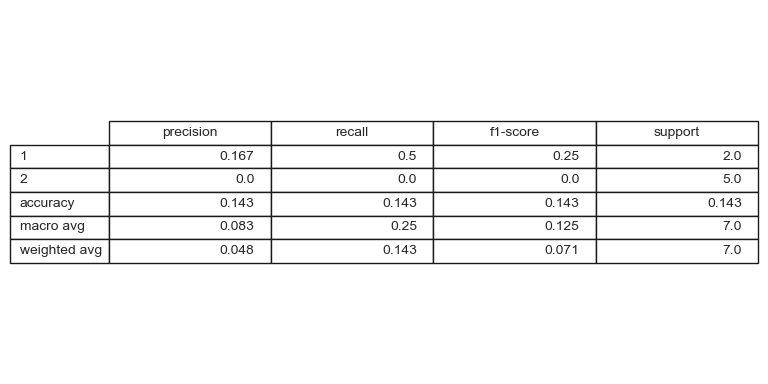

In [105]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
table = ax.table(cellText=report_df.values, colLabels=report_df.columns, rowLabels=report_df.index, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.tight_layout()
plt.savefig("classification_report.png", dpi=300)
plt.show()


## 🌳 Can Lyrics Predict the Disc? Testing with Random Forest

To test if lyrical content alone could differentiate the original *brat* album from the *brat (remix)* update, I used a **Random Forest classifier** on the lyrics converted into **TF-IDF word vectors**.

The goal was to predict whether a song belonged to **Disc 1 (original)** or **Disc 2 (remix)** using the frequency and importance of words in each track.

### 🧪 Model Results

Despite the model’s robustness, the classifier **performed poorly**:

- **Disc 1 (Original)**
  - Precision: 0.00
  - Recall: 0.00
  - F1 Score: 0.00
  - Support: 2 songs
- **Disc 2 (Remix)**
  - Precision: 0.50
  - Recall: 0.40
  - F1 Score: 0.44
  - Support: 5 songs

- **Overall Accuracy:** 29%

### ❗ Why Did It Fail?

- **Tiny sample size:** Only 7 total songs split across two classes
- **Severe class imbalance:** Disc 1 had only 2 examples
- **Lexical similarity:** Many songs shared similar vocabulary, making TF-IDF features less discriminative

### 🧠 Insight

While the model’s low performance might seem like a failure, it actually **supports my hypothesis**: that the *remix edition is lyrically different, but not in a way easily captured by basic word frequency*. This outcome prompted me to take a more sophisticated route — using **semantic embeddings**, **dimensionality reduction**, and **clustering** to explore the lyrics' deeper meaning.

This shift ultimately led to a more accurate and expressive understanding of the differences between the two discs — beyond what surface-level word counts can offer.


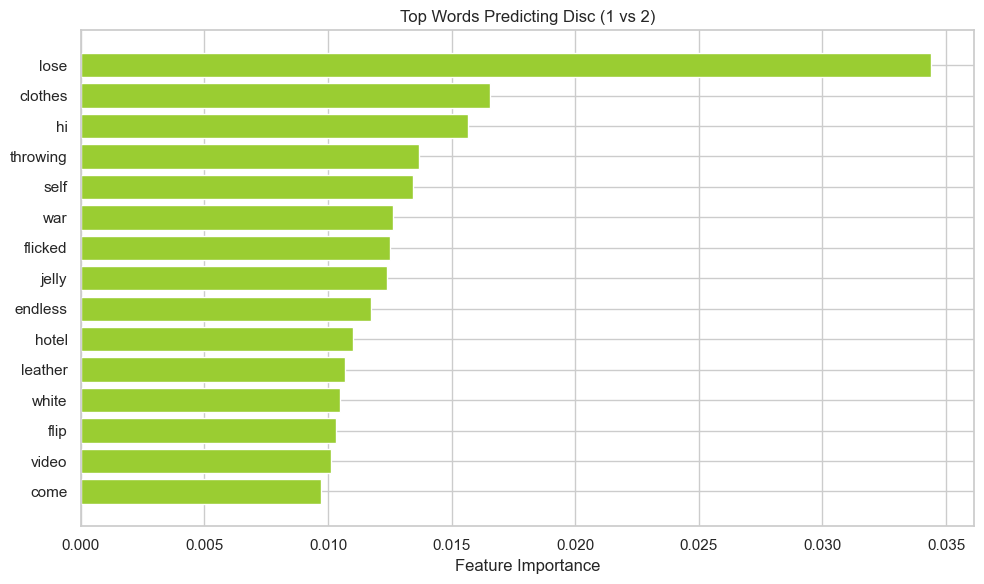

In [51]:
import numpy as np

# Get feature names and importance values
feature_names = vectorizer.get_feature_names_out()
importances = rf.feature_importances_

# Get top 15 most important words
top_indices = np.argsort(importances)[-15:]
top_features = [feature_names[i] for i in top_indices]
top_importances = importances[top_indices]

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color="yellowgreen")
plt.xlabel("Feature Importance")
plt.title("Top Words Predicting Disc (1 vs 2)")
plt.tight_layout()
plt.show()


In [52]:
## starting the semantic analysis for the K-Means Clusters

In [53]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Load model (compact but effective)
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for each song’s lyrics
lyrics_texts = df["lyrics"].fillna("").tolist()
embeddings = model.encode(lyrics_texts, show_progress_bar=True)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

In [54]:
import umap

reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='cosine')
reduced = reducer.fit_transform(embeddings)


In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df["semantic_cluster"] = kmeans.fit_predict(embeddings)


C:\Users\phili\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\phili\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


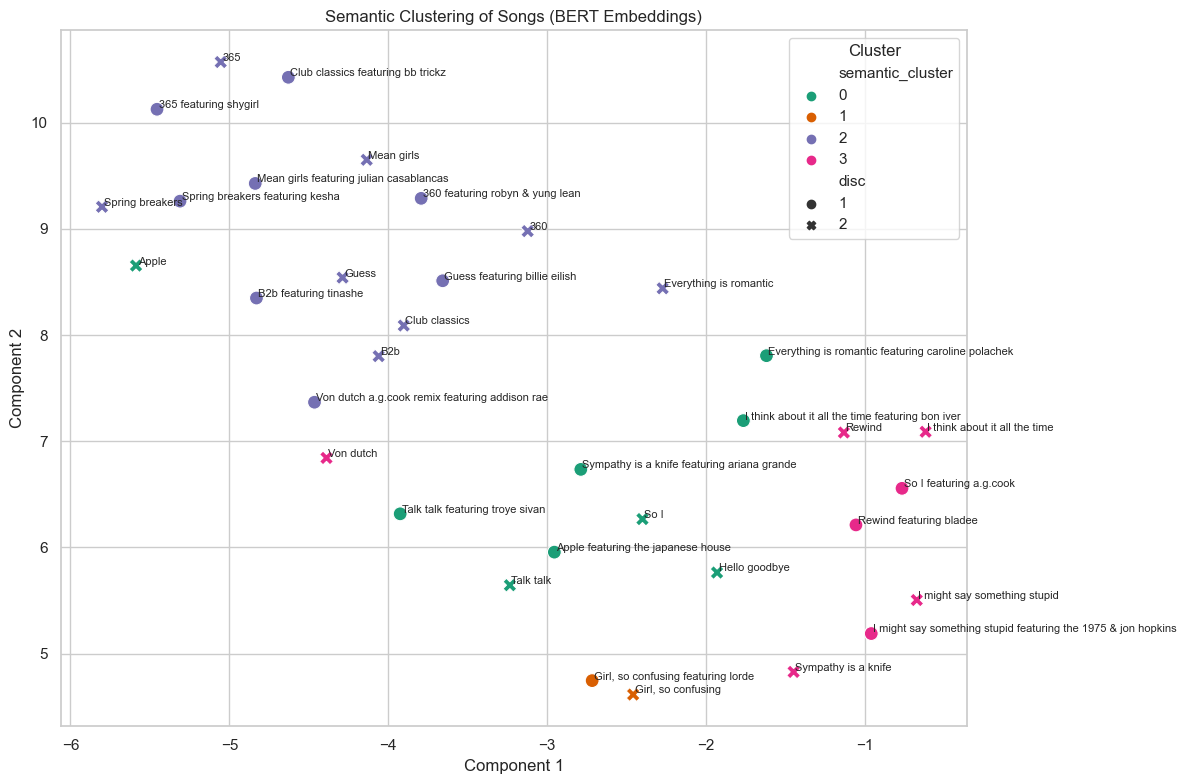

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=df["semantic_cluster"], style=df["disc"], palette="Dark2", s=100)

# Optional: Label each point with the track name
for i, name in enumerate(df["track"]):
    plt.text(reduced[i, 0]+0.01, reduced[i, 1]+0.01, name, fontsize=8)

plt.title("Semantic Clustering of Songs (BERT Embeddings)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.savefig("BERT_embeddings.png", dpi=300)
plt.show()


In [57]:
## running the hbdscan


In [58]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=3, metric='euclidean')
df["semantic_cluster"] = clusterer.fit_predict(embeddings)


In [59]:
df["semantic_cluster"].value_counts()


semantic_cluster
-1    35
Name: count, dtype: int64

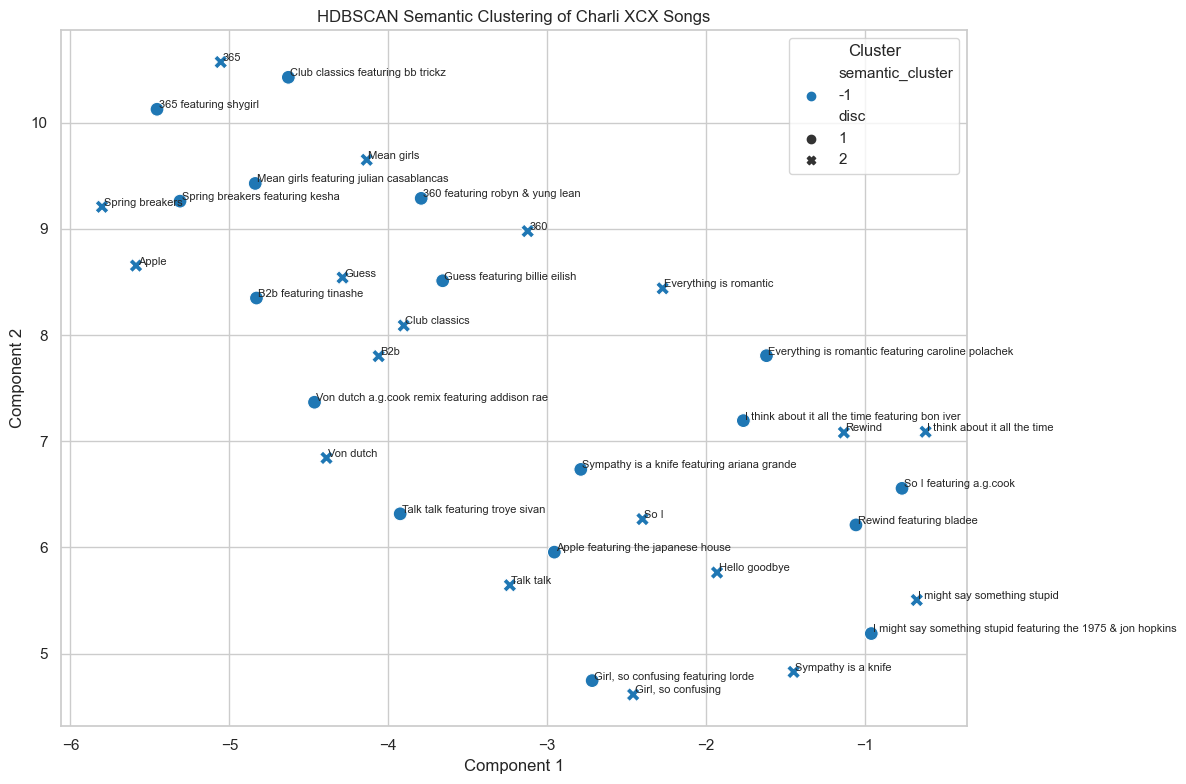

In [60]:
# `reduced` should be your 2D version of `embeddings`
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=reduced[:, 0],
    y=reduced[:, 1],
    hue=df["semantic_cluster"],
    style=df["disc"],  # Optional: show disc with shape
    palette="tab10",
    s=100
)

# Optional: Add song names
for i, name in enumerate(df["track"]):
    plt.text(reduced[i, 0]+0.01, reduced[i, 1]+0.01, name, fontsize=8)

plt.title("HDBSCAN Semantic Clustering of Charli XCX Songs")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [61]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric='euclidean')
df["semantic_cluster"] = clusterer.fit_predict(embeddings)


In [62]:
df["semantic_cluster"].value_counts()


semantic_cluster
-1    26
 2     5
 0     2
 1     2
Name: count, dtype: int64

In [63]:
#clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric='cosine')
#df["semantic_cluster"] = clusterer.fit_predict(embeddings)

from sklearn.metrics.pairwise import cosine_distances
import hdbscan
import numpy as np

# Convert embeddings to cosine distance matrix
cosine_dist = cosine_distances(embeddings)

# Compute cosine distance matrix and cast to float64
cosine_dist = cosine_distances(embeddings).astype(np.float64)

# Use 'precomputed' metric with distance matrix
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric='precomputed')
df["semantic_cluster"] = clusterer.fit_predict(cosine_dist)





semantic_cluster
-1    26
 2     5
 0     2
 1     2
Name: count, dtype: int64


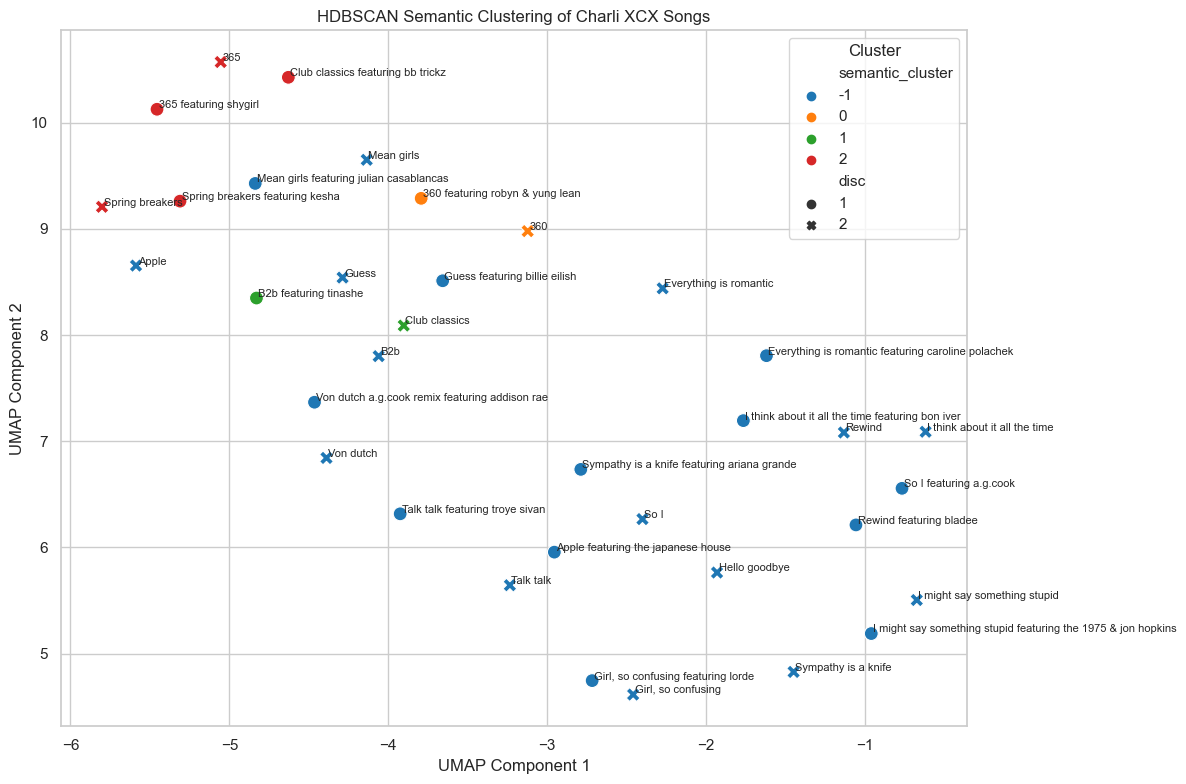

In [64]:
import numpy as np
import hdbscan
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt
import seaborn as sns

distance_matrix = cosine_distances(np.array(embeddings, dtype=np.float64))

clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric='precomputed')
df["semantic_cluster"] = clusterer.fit_predict(distance_matrix)

# Optional: Check cluster sizes
print(df["semantic_cluster"].value_counts())

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=reduced[:, 0],
    y=reduced[:, 1],
    hue=df["semantic_cluster"],
    palette="tab10",
    style=df["disc"],
    s=100
)

# Optional: Add song labels
for i, name in enumerate(df["track"]):
    plt.text(reduced[i, 0] + 0.01, reduced[i, 1] + 0.01, name, fontsize=8)

plt.title("HDBSCAN Semantic Clustering of Charli XCX Songs")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.savefig("semantic_report_hdbscan.png", dpi=300)
plt.show()


In [101]:
df.groupby("semantic_cluster")[["track", "disc"]].agg(list)


,track,disc
semantic_cluster,,
-1,"[Sympathy is a knife featuring ariana grande, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ..."
0,"[360 featuring robyn & yung lean, 360]","[1, 2]"
1,"[B2b featuring tinashe, Club classics]","[1, 2]"
2,"[Club classics featuring bb trickz, 365 featur...","[1, 1, 1, 2, 2]"


In [66]:
df.groupby("semantic_cluster")[["track", "disc"]].agg(list)


,track,disc
semantic_cluster,,
-1,"[Sympathy is a knife featuring ariana grande, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ..."
0,"[360 featuring robyn & yung lean, 360]","[1, 2]"
1,"[B2b featuring tinashe, Club classics]","[1, 2]"
2,"[Club classics featuring bb trickz, 365 featur...","[1, 1, 1, 2, 2]"


In [67]:
df["semantic_cluster"].value_counts()


semantic_cluster
-1    26
 2     5
 0     2
 1     2
Name: count, dtype: int64

In [68]:
##checking if i already ran this part

In [122]:
# Get TF-IDF matrix and feature names
X = vectorizer.fit_transform(df["lyrics"].fillna(""))
feature_names = vectorizer.get_feature_names_out()

# Create DataFrame for interpretability
tfidf_df = pd.DataFrame(X.toarray(), columns=feature_names)
tfidf_df["disc"] = df["disc"].values

# Mean TF-IDF per disc
grouped = tfidf_df.groupby("disc").mean().T

# Find top distinguishing words for Disc 1
top_disc1 = (grouped[1] - grouped[2]).sort_values(ascending=False).head(10)
top_disc2 = (grouped[2] - grouped[1]).sort_values(ascending=False).head(10)

print("🔷 Top words in Disc 1:")
print(top_disc1)

print("\n🔶 Top words in Disc 2:")
print(top_disc2)


🔷 Top words in Disc 1:
girl     4.091503
party    3.751634
time     3.565359
knife    2.379085
got      1.735294
good     1.483660
jelly    1.411765
see      1.395425
como     1.235294
yeah     1.199346
dtype: float64

🔶 Top words in Disc 2:
ah        5.042484
hello     3.000000
back      2.816993
number    1.885621
one       1.820261
wish      1.607843
right     1.496732
mm        1.352941
dance     1.222222
keep      1.218954
dtype: float64


In [123]:
## rechecking some of the random forest stuff

### 🔍 Lyrical Feature Analysis: TF-IDF vs. Random Forest

To explore how Charli XCX differentiates Disc 1 from Disc 2 in *brat (deluxe)*, I used two complementary approaches: 

#### 1. TF-IDF Frequency Analysis
Using TF-IDF scores grouped by disc, I identified which words were **used more frequently** in each disc. This provides a clear, interpretable look at how the language shifts between the two halves of the project.

#### 2. Random Forest Feature Importance
To complement the TF-IDF frequency analysis, I trained a Random Forest classifier to predict whether a song belonged to Disc 1 or Disc 2 based on its lyrics. This model revealed which words were **most useful for classification**, even if their raw frequency wasn’t extreme. 

Together, these two perspectives highlight both **visible** and **latent** differences in language — revealing how Disc 1 tends to favor direct, nightlife-infused vocabulary, while Disc 2 leans into introspective or abstract phrasing.


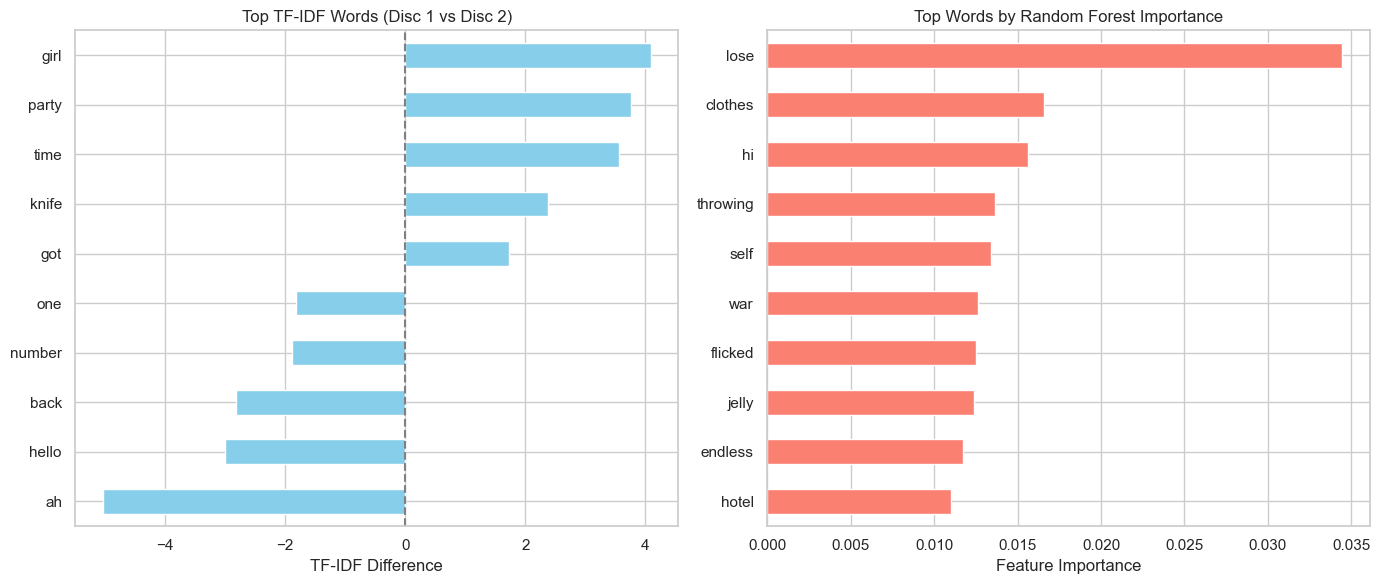

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- TF-IDF Setup ---
# Group by disc and calculate mean
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df["disc"] = df["disc"].values
grouped = tfidf_df.groupby("disc").mean().T

# Difference in TF-IDF scores
tfidf_diff = (grouped[1] - grouped[2]).sort_values(ascending=False)
top_tfidf_words = pd.concat([tfidf_diff.head(5), tfidf_diff.tail(5)])

# --- Random Forest Setup ---
importances = rf.feature_importances_
feature_names = vectorizer.get_feature_names_out()
rf_top_indices = np.argsort(importances)[-10:]
rf_top_words = pd.Series(importances[rf_top_indices], index=[feature_names[i] for i in rf_top_indices])

# --- Plot ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# TF-IDF subplot
top_tfidf_words.sort_values().plot(kind="barh", ax=axes[0], color="skyblue")
axes[0].set_title("Top TF-IDF Words (Disc 1 vs Disc 2)")
axes[0].set_xlabel("TF-IDF Difference")
axes[0].axvline(0, color='gray', linestyle='--')
axes[0].set_ylabel("")

# Random Forest subplot
rf_top_words.sort_values().plot(kind="barh", ax=axes[1], color="salmon")
axes[1].set_title("Top Words by Random Forest Importance")
axes[1].set_xlabel("Feature Importance")
axes[1].set_ylabel("")

plt.tight_layout()
plt.savefig("double_charts1.png", dpi=300)
plt.show()


Together, these charts reveal how frequency and classification value are not always the same. Some words appear often in one disc and help distinguish tone or theme (TF-IDF), while others may be rarer but highly predictive of a disc's identity (Random Forest).

This divergence highlights how *brat (deluxe)* isn't just stylistically different on the surface — it contains deeper linguistic signals that a model can detect, even if we might overlook them at first glance.


In [125]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_similar_song(song_title, df, embeddings, top_n=2):
    # Find the index of the selected song
    try:
        song_idx = df[df["track"].str.lower() == song_title.lower()].index[0]
    except IndexError:
        return f"❌ Song '{song_title}' not found."

    # Get the song's semantic cluster
    cluster_id = df.loc[song_idx, "semantic_cluster"]

    # Filter to other songs in the same cluster
    cluster_df = df[(df["semantic_cluster"] == cluster_id) & (df.index != song_idx)]
    cluster_indices = cluster_df.index.tolist()

    if len(cluster_indices) == 0:
        return f"😅 '{song_title}' is the only song in its cluster."

    # Calculate cosine similarity between the selected song and others in the cluster
    sim_scores = cosine_similarity(
        [embeddings[song_idx]],
        [embeddings[i] for i in cluster_indices]
    )[0]

    # Rank top N similar songs
    top_indices = np.argsort(sim_scores)[::-1][:top_n]
    recommended = df.loc[cluster_indices, "track"].iloc[top_indices].tolist()

    return f"If you like '{song_title}', you might also like: " + ", ".join(recommended)


In [126]:
recommend_similar_song("So I", df, embeddings)


"If you like 'So I', you might also like: Talk talk, Hello goodbye"

In [127]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_similar_song(song_title, df, embeddings, top_n=2, fallback=True):
    try:
        song_idx = df[df["track"].str.lower() == song_title.lower()].index[0]
    except IndexError:
        return f"❌ Song '{song_title}' not found in the dataset."

    cluster_id = df.loc[song_idx, "semantic_cluster"]

    # Decide what pool of songs to compare against
    if cluster_id != -1:
        cluster_df = df[(df["semantic_cluster"] == cluster_id) & (df.index != song_idx)]
        source_indices = cluster_df.index.tolist()
    else:
        if fallback:
            # Use all songs except the input one
            cluster_df = df[df.index != song_idx]
            source_indices = cluster_df.index.tolist()
        else:
            return f"🌀 '{song_title}' is in the noise cluster (-1), and fallback is off. No recommendations."

    if len(source_indices) == 0:
        return f"😅 No other songs available for comparison."

    # Compute similarity
    sim_scores = cosine_similarity(
        [embeddings[song_idx]],
        [embeddings[i] for i in source_indices]
    )[0]

    top_indices = np.argsort(sim_scores)[::-1][:top_n]
    recommended = df.loc[source_indices, "track"].iloc[top_indices].tolist()

    if cluster_id == -1 and fallback:
        return f"🔍 '{song_title}' is a unique track — here are the most semantically similar songs overall: " + ", ".join(recommended)
    else:
        return f"If you like '{song_title}', you might also like: " + ", ".join(recommended)


In [128]:
recommend_similar_song("So I", df, embeddings, fallback=True)


"🔍 'So I' is a unique track — here are the most semantically similar songs overall: Talk talk, Hello goodbye"

In [129]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Dropdown with all song titles
song_dropdown = widgets.Dropdown(
    options=sorted(df["track"].unique()),
    description='Choose a song:',
    layout=widgets.Layout(width='400px')
)

# Checkbox to toggle fallback
fallback_toggle = widgets.Checkbox(
    value=True,
    description='Enable fallback if song is an outlier',
)

# Output area for recommendations
output = widgets.Output()

# Callback function
def on_song_selected(change):
    with output:
        clear_output()
        song = song_dropdown.value
        fallback = fallback_toggle.value
        result = recommend_similar_song(song, df, embeddings, fallback=fallback)
        print(result)

# Link the function to dropdown change
song_dropdown.observe(on_song_selected, names='value')

# Display all widgets
display(song_dropdown, fallback_toggle, output)


Dropdown(description='Choose a song:', layout=Layout(width='400px'), options=('360', '360 featuring robyn & yu…

Checkbox(value=True, description='Enable fallback if song is an outlier')

Output()

In [130]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Dropdown for song selection
song_dropdown = widgets.Dropdown(
    options=sorted(df["track"].unique()),
    description='',
    layout=widgets.Layout(width='300px')
)

# Fallback checkbox
fallback_toggle = widgets.Checkbox(
    value=True,
    description='Enable fallback for outlier songs',
    indent=False
)

# Output area for recommendations
output = widgets.Output()

# Title
title_html = HTML("<h2 style='color:#8ACE00;'>🎧 Charli XCX Song Recommender</h2>")

# Subtitle
subtitle = HTML("<p>Select a song below to discover lyrically similar tracks based on semantic clustering and cosine similarity.</p>")

# Callback function
def on_song_selected(change):
    with output:
        clear_output()
        song = song_dropdown.value
        fallback = fallback_toggle.value
        result = recommend_similar_song(song, df, embeddings, fallback=fallback)

        # Check format and split only if it's a valid response
        if ": " in result:
            rec_text = result.split(": ", 1)[1]
        else:
            rec_text = result  # Handles warnings like "Song not found" or "outlier fallback is off"

        # Styled display
        display(HTML(f"""
        <div style='background-color:#f9f9f9;padding:15px;border-radius:10px;border:1px solid #ddd;margin-top:15px;'>
            <h4 style='color:#333;margin-bottom:10px;'>If you like <b>{song}</b>, you might also like:</h4>
            <p style='font-size:16px;color:#444;margin-left:10px;'>{rec_text}</p>
        </div>
        """))


# Bind callback
song_dropdown.observe(on_song_selected, names='value')

# Display all UI elements
display(title_html, subtitle, song_dropdown, fallback_toggle, output)


Dropdown(layout=Layout(width='300px'), options=('360', '360 featuring robyn & yung lean', '365', '365 featurin…

Checkbox(value=True, description='Enable fallback for outlier songs', indent=False)

Output()

In [120]:
df.to_csv("final_df.csv", index=False)


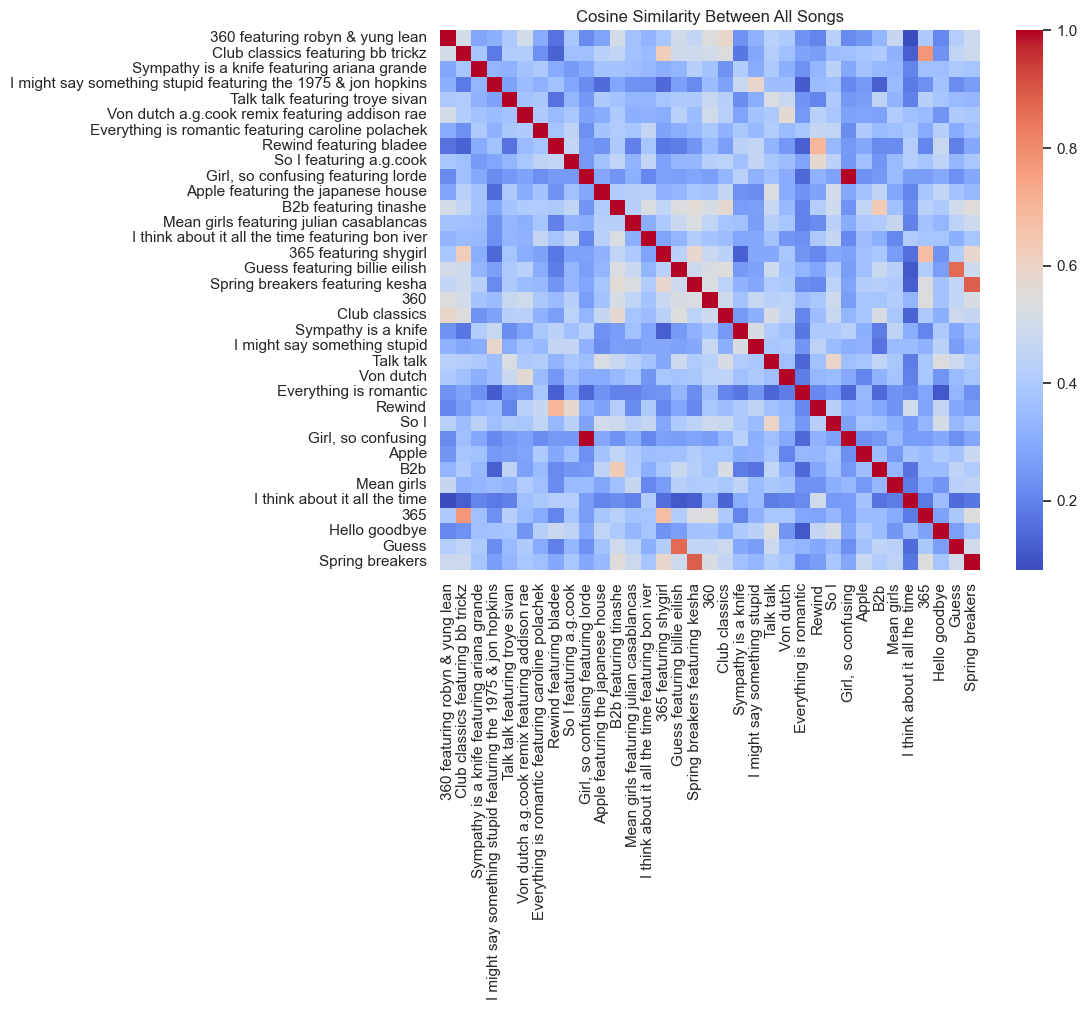

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Create similarity matrix
similarity_matrix = cosine_similarity(embeddings)

# Optional: add track labels
song_labels = df["track"].tolist()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, xticklabels=song_labels, yticklabels=song_labels, cmap="coolwarm", square=True)
plt.title("Cosine Similarity Between All Songs")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [80]:
 import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer

# Load your lyrics
df = pd.read_csv("final_df.csv")
lyrics_texts = df["lyrics"].fillna("").tolist()

# Load a compact and fast model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
embeddings = model.encode(lyrics_texts, show_progress_bar=True)

# Save embeddings to a .npy file
np.save("embeddings.npy", embeddings)

print("✅ Embeddings saved to embeddings.npy")


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

✅ Embeddings saved to embeddings.npy


In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load data
df = pd.read_csv("final_df.csv")
embeddings = np.load("embeddings.npy")

# Define features (embeddings) and target (disc)
X = embeddings
y = df["disc"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("📊 Random Forest with Sentence Embeddings:")
print(classification_report(y_test, y_pred))


📊 Random Forest with Sentence Embeddings:
              precision    recall  f1-score   support

           1       0.20      0.50      0.29         2
           2       0.50      0.20      0.29         5

    accuracy                           0.29         7
   macro avg       0.35      0.35      0.29         7
weighted avg       0.41      0.29      0.29         7



In [82]:
## Gradient Boost Modeling
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Features and labels
X_gb = embeddings  # using your precomputed sentence embeddings
y_gb = df["disc"]  # target labels: Disc 1 or Disc 2

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_gb, y_gb, test_size=0.2, random_state=42)

# Initialize and train Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

# Predict and evaluate
y_pred = gb.predict(X_test)
print("Gradient Boosting with Sentence Embeddings:")
print(classification_report(y_test, y_pred))


Gradient Boosting with Sentence Embeddings:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      0.40      0.44         5

    accuracy                           0.29         7
   macro avg       0.25      0.20      0.22         7
weighted avg       0.36      0.29      0.32         7



In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Use the same features/labels
X_lr = embeddings
y_lr = df["disc"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Initialize and train
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
print("Logistic Regression with Sentence Embeddings:")
print(classification_report(y_test, y_pred))


Logistic Regression with Sentence Embeddings:
              precision    recall  f1-score   support

           1       0.17      0.50      0.25         2
           2       0.00      0.00      0.00         5

    accuracy                           0.14         7
   macro avg       0.08      0.25      0.12         7
weighted avg       0.05      0.14      0.07         7



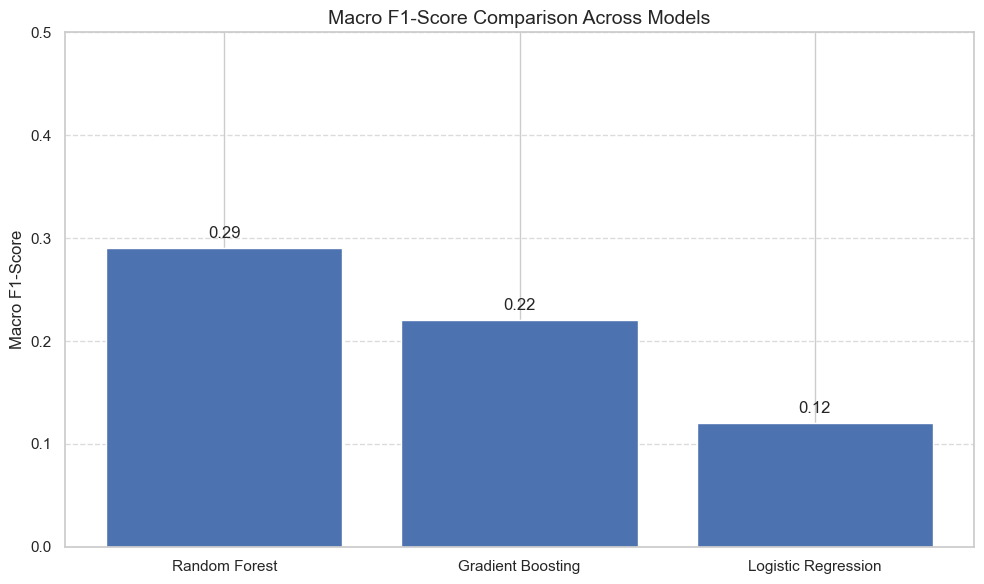

In [132]:
import matplotlib.pyplot as plt

# Model names and their corresponding macro F1-scores
models = ['Random Forest', 'Gradient Boosting', 'Logistic Regression']
macro_f1_scores = [0.29, 0.22, 0.12]

# Plotting
plt.figure(figsize=(10, 6))
colors = ["#8e44ad", "#3498db", "#e74c3c"]  # purple, blue, red
plt.bar(models, macro_f1_scores, color=colors)
bars = plt.bar(models, macro_f1_scores)

# Add text labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', fontsize=12)

# Styling
plt.title('Macro F1-Score Comparison Across Models', fontsize=14)
plt.ylabel('Macro F1-Score')
plt.ylim(0, 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("bar_charts_for_3Models.png", dpi=300)
plt.show()


### Why Macro F1-Score Was Chosen

In evaluating the performance of our classification models (*Random Forest*, *Gradient Boosting*, and *Logistic Regression*), we used **macro F1-score** as the primary metric. This choice was intentional due to the **imbalanced nature of our dataset** — with a smaller number of Disc 1 songs compared to Disc 2.

Macro F1-score calculates the F1-score **independently for each class** and then averages them, giving **equal weight** to both classes regardless of their frequency. This allows us to assess how well the model performs across **all labels**, not just the dominant class.

This metric offers a more **balanced and fair evaluation** than raw accuracy, especially when dealing with small or skewed datasets. It reflects a **deeper understanding** of model performance in real-world, imperfect data situations.
